In [1]:
!pip install rdkit
!pip install pandas
!pip install git+https://github.com/mcs07/PubChemPy.git

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.1/36.1 MB 19.3 MB/s eta 0:00:00
  Cloning https://github.com/mcs07/PubChemPy.git to /tmp/pip-req-build-1x73ewvd
  Running command git clone --filter=blob:none --quiet https://github.com/mcs07/PubChemPy.git /tmp/pip-req-build-1x73ewvd
  Resolved https://github.com/mcs07/PubChemPy.git to commit a5d86463dab32dd3589479cf9b9737e26651dd7d
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for PubChemPy: filename=pubchempy-1.0.4-py3-none-any.whl size=21354 sha256=3ec8b5bb757a76c759b36ac28d46ac741b835aeb8fb55821d17eed630258e6a7
  Stored in directory: /tmp/pip-ephem-wheel-cache-u54p728w/wheels/ef/9c/d9/4fc18c3c8e318d83a3f6db4d4446460439839bf2848de2985a
Successfully built PubChemPy


In [2]:
from rdkit import Chem
from rdkit.Chem import MolFromSmiles, Draw, rdFMCS
from rdkit.Chem.Draw import MolsToGridImage
import pandas as pd
import pubchempy as pcp

In [3]:
hiv = pd.read_csv('https://raw.githubusercontent.com/sharonlae77/useful_codes/main/data/HIV.csv')
actives = hiv[hiv['HIV_active']==1].reset_index(drop=True)
molecule = [MolFromSmiles(i) for i in actives['smiles']]

In [4]:
try:
    compound = pcp.get_compounds('indole','name')[0]
    substructure_smiles = compound.smiles
except:
    substructure_smiles = None

substructure = MolFromSmiles(substructure_smiles)

In [5]:
## Instead of the name, you can provide the SMILES of the substructure as well
# smiles = 'C1=CC=C2C(=C1)C=CN2'
# substructure = MolFromSmiles(smiles)

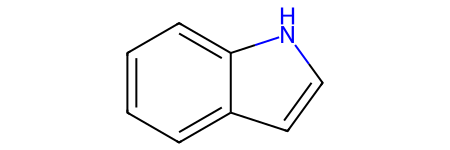

In [6]:
substructure

In [7]:
present = []
for mol in molecule:
    match = mol.GetSubstructMatch(substructure)
    if match:
      present.append('yes')
    else:
      present.append('no')

present = pd.DataFrame(present,columns=['indole_present'])
df = pd.concat([actives,present],axis=1)

df[df['indole_present']=='yes']

,smiles,activity,HIV_active,indole_present
204,Cn1c2ccccc2c2nnc(S)nc21,CM,1,yes
230,CCC1CC2CC3c4[nH]c5ccc(O)cc5c4CCN(C2)C13.Cl,CM,1,yes
266,O=C(Nc1ccc(Cl)cc1)Sc1nnc2c(n1)[nH]c1ccccc12,CM,1,yes
377,Cl.c1ccc2c(c1)[nH]c1cnc3c4cccnc4[nH]c3c12,CM,1,yes
395,O=C1c2c(c3c4ccccc4[nH]c3c3[nH]c4ccccc4c23)C(=O...,CM,1,yes
405,Cl.c1ccc(CNc2ccc3[nH]c4cnccc4c3c2)cc1,CM,1,yes
582,COc1ccc(N2C(=O)C3c4[nH]c5ccccc5c4C4CCC(C(C)(C)...,CM,1,yes
583,COc1cccc(N2C(=O)C3c4[nH]c5ccccc5c4C4CCC(C(C)(C...,CM,1,yes
691,N#CNC1=NCCC(=O)N1CCc1c[nH]c2ccccc12,CM,1,yes
728,COc1ccc(N2C(=O)C3c4[nH]c5ccc(C)cc5c4C4CCC(C(C)...,CA,1,yes


In [8]:
len(df[df['indole_present']=='yes'])

25

In [9]:
len(actives)

1443

In [10]:
df_actives = df[df['indole_present']=='yes']

In [11]:
df_actives

,smiles,activity,HIV_active,indole_present
204,Cn1c2ccccc2c2nnc(S)nc21,CM,1,yes
230,CCC1CC2CC3c4[nH]c5ccc(O)cc5c4CCN(C2)C13.Cl,CM,1,yes
266,O=C(Nc1ccc(Cl)cc1)Sc1nnc2c(n1)[nH]c1ccccc12,CM,1,yes
377,Cl.c1ccc2c(c1)[nH]c1cnc3c4cccnc4[nH]c3c12,CM,1,yes
395,O=C1c2c(c3c4ccccc4[nH]c3c3[nH]c4ccccc4c23)C(=O...,CM,1,yes
405,Cl.c1ccc(CNc2ccc3[nH]c4cnccc4c3c2)cc1,CM,1,yes
582,COc1ccc(N2C(=O)C3c4[nH]c5ccccc5c4C4CCC(C(C)(C)...,CM,1,yes
583,COc1cccc(N2C(=O)C3c4[nH]c5ccccc5c4C4CCC(C(C)(C...,CM,1,yes
691,N#CNC1=NCCC(=O)N1CCc1c[nH]c2ccccc12,CM,1,yes
728,COc1ccc(N2C(=O)C3c4[nH]c5ccc(C)cc5c4C4CCC(C(C)...,CA,1,yes


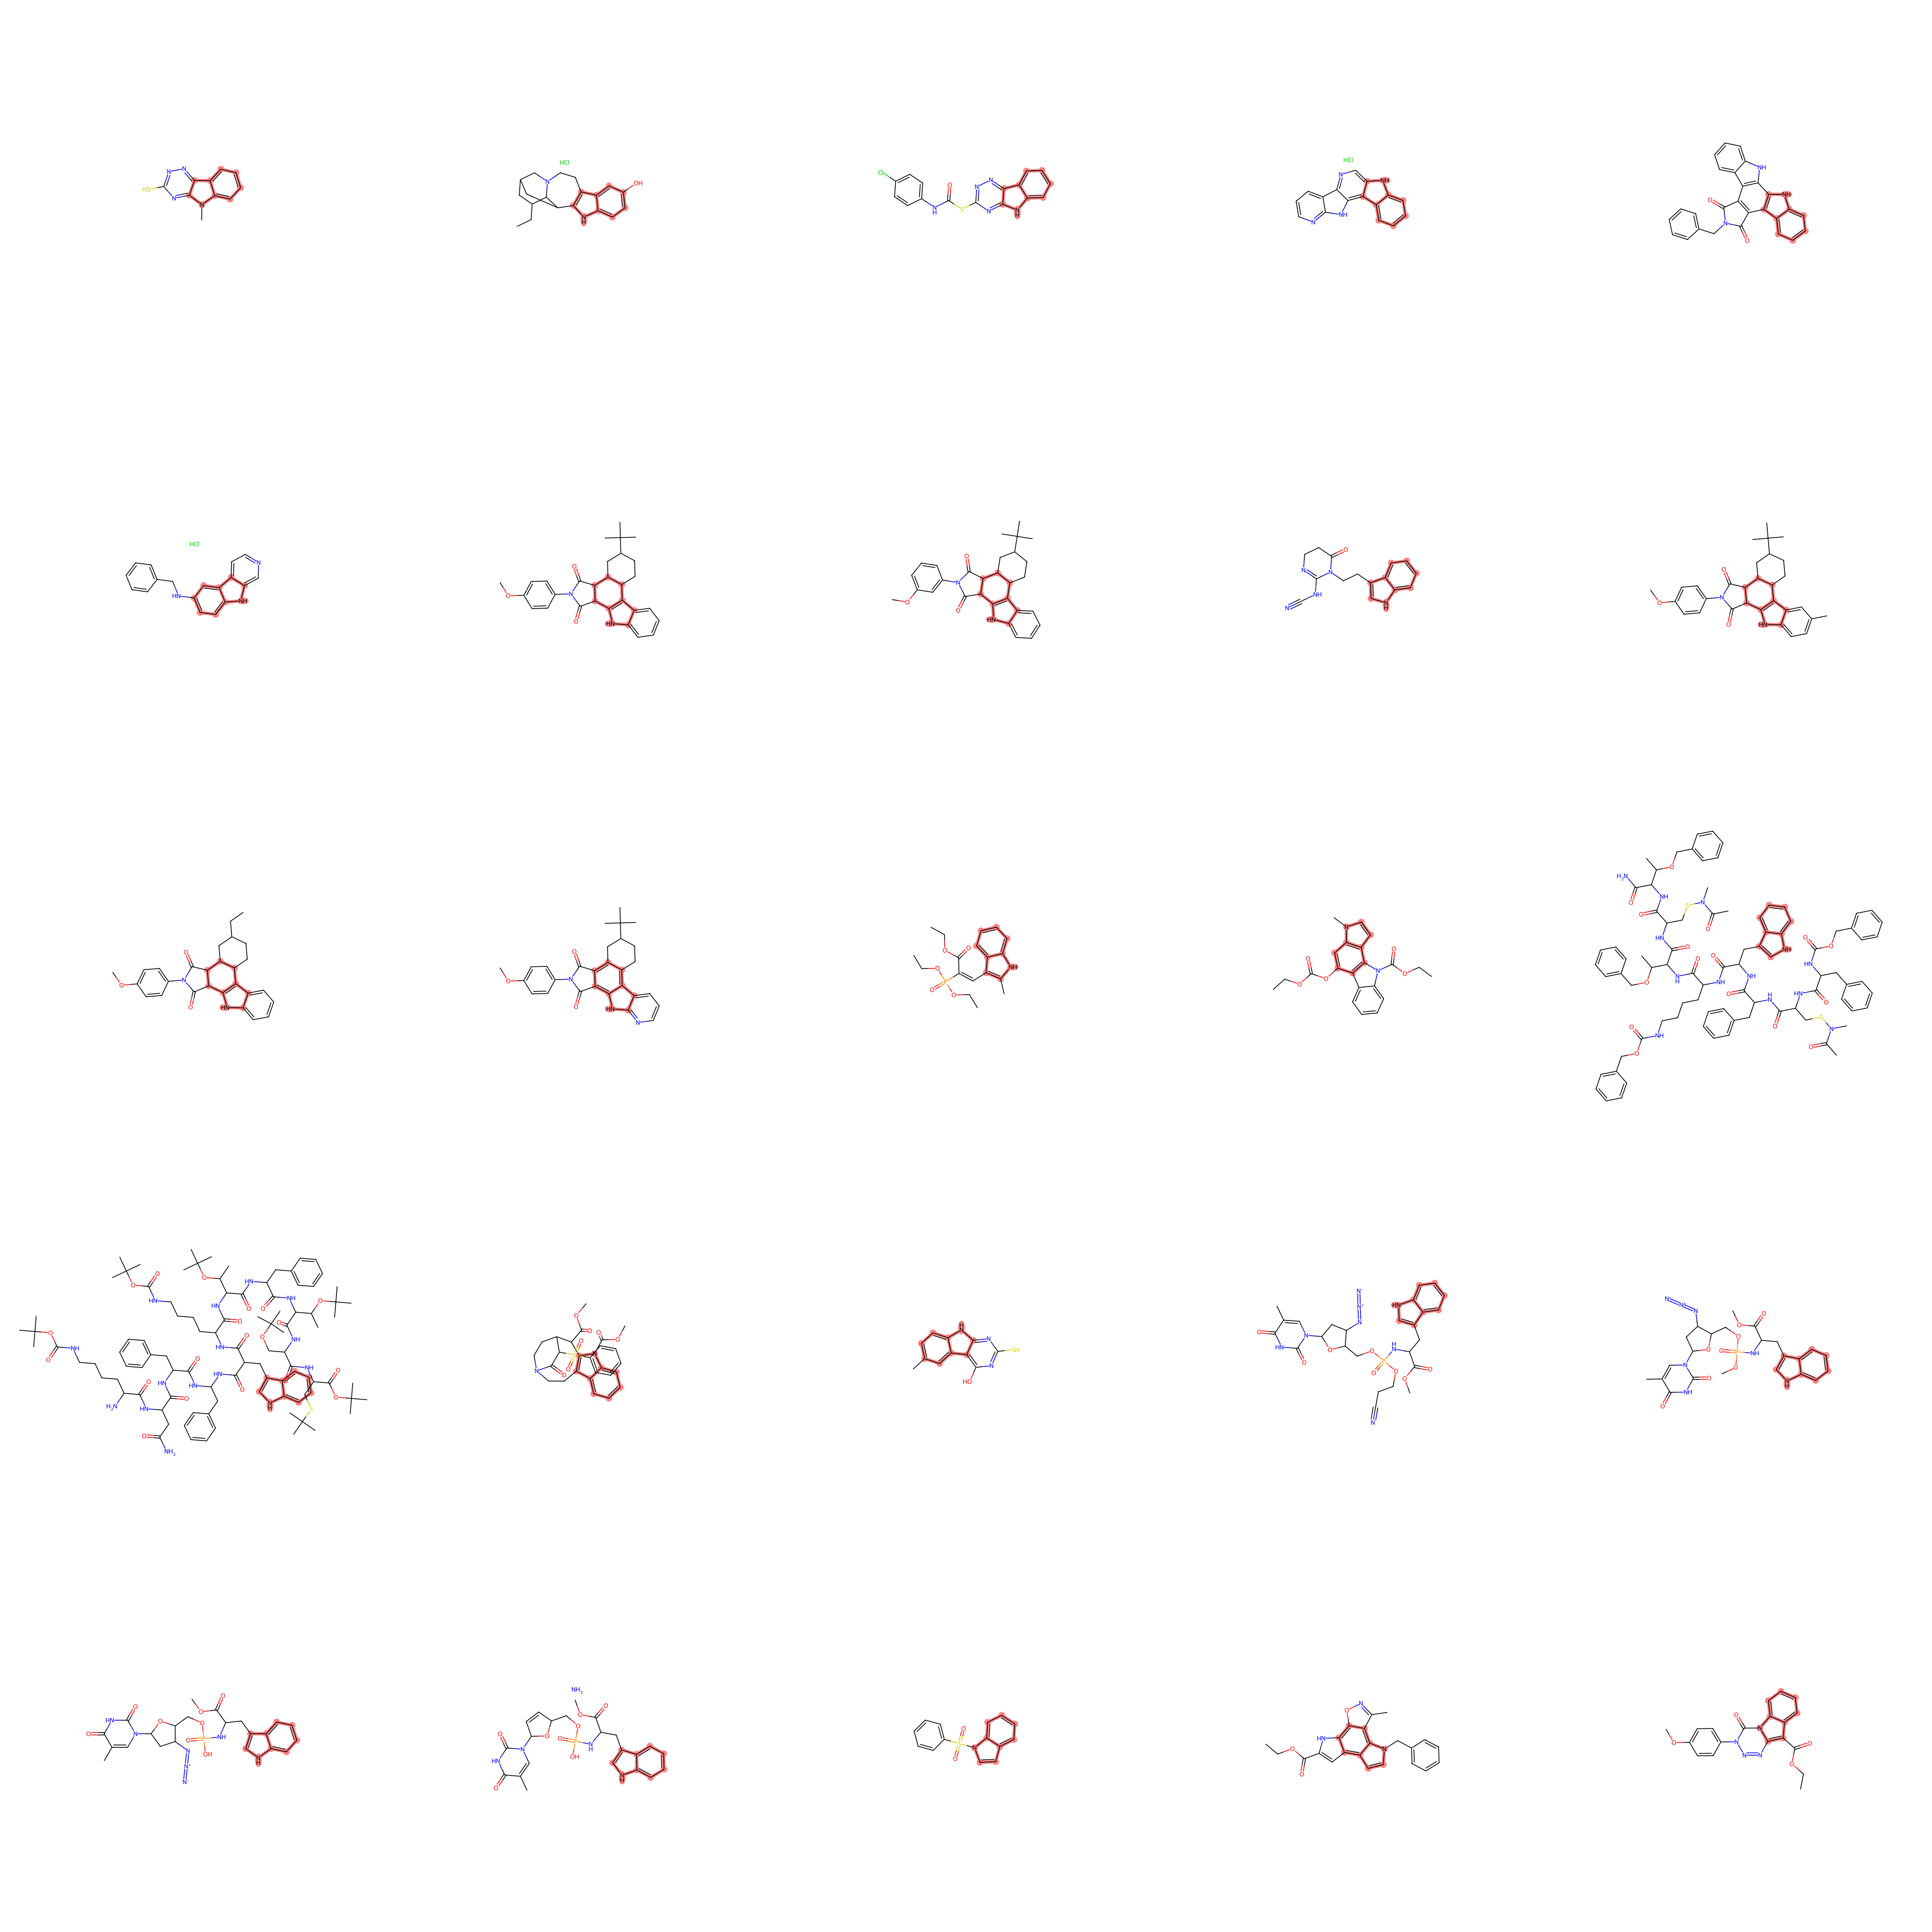

In [12]:
molecule = [MolFromSmiles(i) for i in df_actives['smiles']]

res = rdFMCS.FindMCS(molecule,
                     completeRingsOnly=True
                    )

substructure_smarts = res.smartsString

to_highlight = []

for mol in molecule:
  substructure = Chem.MolFromSmarts(substructure_smarts)
  if mol and substructure:
    match = mol.GetSubstructMatch(substructure)
    if match:
      to_highlight.append(match)
    else:
      to_highlight.append([])
  else:
    to_highlight.append([])

opts = Draw.MolDrawOptions()
img = MolsToGridImage(molecule,
											molsPerRow=5,
											subImgSize=(1000, 1000),
											returnPNG=True,
                      drawOptions=opts,
                      highlightAtomLists=to_highlight)
img